In [1]:
import sympy
from sympy.solvers import solve
from sympy.abc import y,z, a, b, c
x = sympy.Symbol("x", real=True)
from IPython.display import display
sympy.init_printing()

In [2]:
exercises = [
    (lambda x: x**3, lambda x: (x-1)),
    (lambda x: x**4+x**2, lambda x: x**4-1),
    (lambda x: x**2+x+1, lambda x: x**2+1),
    (lambda x: 8*x, lambda x: (x**2-1)*(x-1)**2),
    (lambda x: 1, lambda x: (x**8-1)*(x**2+1))
]

Term:


factors: {x - 1: 1}, Solution: {A: 1}


Term:


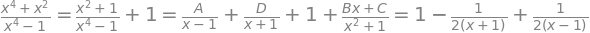

factors: {x - 1: 1, x - I: 1, x + I: 1, x + 1: 1}, Solution: {A: 1/2, B: 0, C: 0, D: -1/2}


Term:


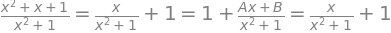

factors: {x - I: 1, x + I: 1}, Solution: {A: 1, B: 0}


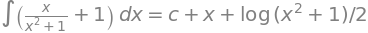

Term:


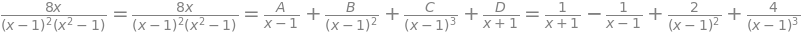

factors: {x - 1: 3, x + 1: 1}, Solution: {A: -1, B: 2, C: 4, D: 1}


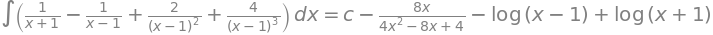

Term:


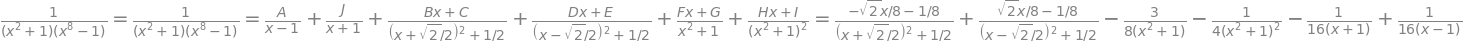

factors: {x - 1: 1, x - I: 2, x + sqrt(2)/2 - sqrt(2)*I/2: 1, x + sqrt(2)/2 + sqrt(2)*I/2: 1, x - sqrt(2)/2 - sqrt(2)*I/2: 1, x - sqrt(2)/2 + sqrt(2)*I/2: 1, x + I: 2, x + 1: 1}, Solution: {A: 1/16, B: -sqrt(2)/8, C: -1/8, D: sqrt(2)/8, E: -1/8, F: 0, G: -3/8, H: 0, I: -1/4, J: -1/16}


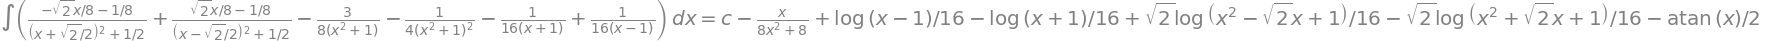

In [3]:
def get_factors(q):
    _, factors = sympy.factor_list(q, x, extension=[sympy.I, sympy.sqrt(2)])
    result = {}
    for factor in factors:
        if factor[0] in result:
            result[factor[0]] += factor[1]
        else:
            result[factor[0]] = factor[1]
    return result

def get_term(factors):
    letters = map(chr, range(65, 123))
    symbols = []
    term = 0
    for fact, mult in factors.items():
        nst = solve(fact - x- a, a)[0]
        if nst.is_real:
            for i in range(mult):
                symbol = sympy.Symbol(next(letters))
                term += symbol / (fact**(i+1))
                symbols.append(symbol)
        elif sympy.im(nst) > 0:
            result = solve(fact * sympy.conjugate(fact) - ((x-b)**2 - c), b,c, dict=True)[0]
            beta, gamma = result[b], result[c]
            for i in range(mult):
                A = sympy.Symbol(next(letters))
                B = sympy.Symbol(next(letters))
                symbols.append(A)
                symbols.append(B)
                term += (A*x+B)/(((x-beta)**2-gamma))**(i+1)
    return term, symbols


for f, q in exercises:
    r, p = sympy.div(f(x), q(x), domain ='QQ')
    factors = get_factors(q(x))
    term, symbols = get_term(factors)
    print("Term:")
    solution = solve(term - p/q(x), symbols, dict=True)[0]
    display(sympy.Eq(f(x) / q(x), sympy.Eq(r+p/q(x), sympy.Eq(r+term, r+term.subs(solution), evaluate=False), evaluate=False), evaluate=False))
    print(f"factors: {factors}, Solution: {solution}")
    integral = sympy.integrate(r+term.subs(solution), x)
    display(sympy.Eq(sympy.Integral(r+term.subs(solution), x), integral + c, evaluate=False))

In [9]:
f = lambda x: x**2

def run_with_one(func):
    return func(1)

In [15]:
def d(func):
    def result(x):
        return func(1+x)
    return result

@d
def test(x):
    return x

test(1)

In [12]:
run_with_one(lambda x: x+1)

In [10]:
letters = map(chr, range(65, 65+26))

In [8]:
next(letters)

'A'

In [11]:
for c in letters:
    print(c)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
